# Project: Investigating Causes of Missed Apointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#newfeat">Feature Engineering</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will be looking at the No-show Appointments dataset, a collection of over 100,000 medical appointments in Brazil, using a variety of tools including: pandas, numpy, and matplotlib. This dataset includes information on the loction of the hospital, the day the appointment was sheduled, the day the appointment was held, whether the family qualified for government assistance, and whether the patient showed up to their appointment, among other features. The purpose of this investigation is to determine what factors were most impactful in a patient not appearing for their appointment, in order to gain insight into how to ensure patients show up and recieve their medical care.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
This dataset is made up of 110527 rows of data across 14 columns: `PatientId`, `AppointmentID`, `Gender`, `ScheduledDay`,
       `AppointmentDay`, `Age`, `Neighbourhood`, `Scholarship`, `Hipertension`,
       `Diabetes`, `Alcoholism`, `Handcap`, `SMS_received`, and `No-show`

In [2]:

df = pd.read_csv("./noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

### Data Cleaning
In order to ensure we have complete information on all of the appointments, we should begin by checking for null values and exclude those from our dataset

In [4]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Now that we have ensured none of the rows are missing data, we can check for and drop duplicates

In [5]:
df.duplicated().sum()

0

Now that we have ensured none of the rows are duplicated, we can check to ensure that none of the columns have data which doesn't fit our expected schema.

In [6]:
for col in df.columns:
  print(f"Number of unique values in {col}: {len(df[col].unique())}")

Number of unique values in PatientId: 62299
Number of unique values in AppointmentID: 110527
Number of unique values in Gender: 2
Number of unique values in ScheduledDay: 103549
Number of unique values in AppointmentDay: 27
Number of unique values in Age: 104
Number of unique values in Neighbourhood: 81
Number of unique values in Scholarship: 2
Number of unique values in Hipertension: 2
Number of unique values in Diabetes: 2
Number of unique values in Alcoholism: 2
Number of unique values in Handcap: 5
Number of unique values in SMS_received: 2
Number of unique values in No-show: 2


There are some suprising values in the data, such as `Handcap` having 5 values, where it is intended to be a boolean value, `Neighbourhood` having 81, and `Age` having 104. Lets investigate these more closely.

In [7]:
uniq_handcap = df["Handcap"].unique()
uniq_handcap

array([0, 1, 2, 3, 4], dtype=int64)

In [8]:
def print_uniq_hancap_counts():
  for v in uniq_handcap:
    print(f"Number of rows with Handcap = {v} : {df[df['Handcap'] == v].shape[0]}")
print_uniq_hancap_counts()

Number of rows with Handcap = 0 : 108286
Number of rows with Handcap = 1 : 2042
Number of rows with Handcap = 2 : 183
Number of rows with Handcap = 3 : 13
Number of rows with Handcap = 4 : 3


It appears that the `Handcap` feature was used as a scale of the severity of the handicap, rather than a boolean as defined by our [data dictionary](https://www.kaggle.com/datasets/joniarroba/noshowappointments). We will change it to match the data dictionary by converting all values >= 1 to 1

In [9]:
df["Handcap"] = df["Handcap"].apply(lambda x: int(x >= 1))
print_uniq_hancap_counts()

Number of rows with Handcap = 0 : 108286
Number of rows with Handcap = 1 : 2241
Number of rows with Handcap = 2 : 0
Number of rows with Handcap = 3 : 0
Number of rows with Handcap = 4 : 0


In [10]:
df["Neighbourhood"].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

It appears there are 81 different values for `Neighborhood`. No changes are needed.

In [11]:
df["Age"].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

The -1 value of some of the data leads me to believe that this is missing data, and while ages of 115 seem unlikely, there are people in Brazil who claim to be 122 years old, so not impossible, but still deserving of investigation.

In [12]:
df[df["Age"] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Only one record, so we will start by looking up the `PatientId` and seeing if we can use that to determine their age, if not we will drop this record.

In [13]:
pid = df[df["Age"] == -1]["PatientId"].max()
pid

465943158731293.0

In [14]:
df[df["PatientId"] == pid]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [15]:
try:
  df = df.drop(index = df[df["PatientId"] == pid].index)
except:
  pass
df[df["PatientId"] == pid]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Now that the -1 value has been dropped, lets investigate the 115 value

In [16]:
df[df["Age"] == 115]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


There are 2 unique patients with 115 marked as the age, but the first is consitant across 4 appointments so it seems to be correct. We should now refine `ScheduledDay` to only include the date, not the time

In [17]:
import datetime
def obj_to_datetime(str):
  return datetime.datetime.strptime(str,"%Y-%m-%dT%H:%M:%SZ")

df["AppointmentDay"] = df["AppointmentDay"].apply(lambda x:obj_to_datetime(x).date())
len(df["AppointmentDay"].unique())

27

Cool now this will be much easier to handle as it is saved as a Date, we should also conver `ScheduledDay` to a Date

In [18]:
df["ScheduledDay"] = df["ScheduledDay"].apply(lambda x:obj_to_datetime(x).date())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


Now that we can compare dates easily, we should run a check to ensure that the `ScheduledDay` is less than the `AppointmentDay`

In [19]:
df[df["ScheduledDay"] > df["AppointmentDay"]]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


There are 5 values that have inconsistant dates, so lets drop these.

In [20]:
df = df[df["ScheduledDay"] <= df["AppointmentDay"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hipertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handcap         110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No-show         110521 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


While we are changing datatypes to better fit the schema we should change `PatientId` and `AppointmentId` to strings, as we don't want to run numerical analysis on these identifying variables.

In [21]:
df["PatientId"] = df["PatientId"].astype(str)
df["AppointmentID"] = df["AppointmentID"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110521 non-null  object
 1   AppointmentID   110521 non-null  object
 2   Gender          110521 non-null  object
 3   ScheduledDay    110521 non-null  object
 4   AppointmentDay  110521 non-null  object
 5   Age             110521 non-null  int64 
 6   Neighbourhood   110521 non-null  object
 7   Scholarship     110521 non-null  int64 
 8   Hipertension    110521 non-null  int64 
 9   Diabetes        110521 non-null  int64 
 10  Alcoholism      110521 non-null  int64 
 11  Handcap         110521 non-null  int64 
 12  SMS_received    110521 non-null  int64 
 13  No-show         110521 non-null  object
dtypes: int64(7), object(7)
memory usage: 12.6+ MB


Finally we should change `No-show` to an int in order to run a correlation analysis against it, and rename the columns to remove typos

In [22]:
df["No-show"] = df["No-show"].apply(lambda x: int(x == "Yes"))
df["No-show"].unique()

array([0, 1], dtype=int64)

In [23]:
df.columns =['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show']
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='newfeat'></a>
## Feature Engineering

The data we have is a great start, but i would like to add one additional field: `DaysInAdvance`. This field will be defined by the number of days in advance of the appointment day the appointment was scheduled

In [24]:
df["DaysInAdvance"] = df["AppointmentDay"] - df["ScheduledDay"]
df["DaysInAdvance"] = df["DaysInAdvance"].apply(lambda x: x.days)
df["DaysInAdvance"].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  80,
        86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,  90,
       151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122, 101,
       105,  92,  97,  93, 107,  95, 139, 132, 179, 117, 146, 123],
      dtype=int64)

<a id='eda'></a>
## Exploratory Data Analysis


First we should look at the correlation coefficient of the numeric variables

In [25]:
df.corr()[["No-show"]].drop("No-show")

,No-show
Age,-0.060320
Scholarship,0.029166
Hypertension,-0.035662
Diabetes,-0.015158
Alcoholism,-0.000181
Handicap,-0.007528
SMS_received,0.126502
DaysInAdvance,0.186320


### How do the number of days in advance affect the no show rate?


<BarContainer object of 129 artists>

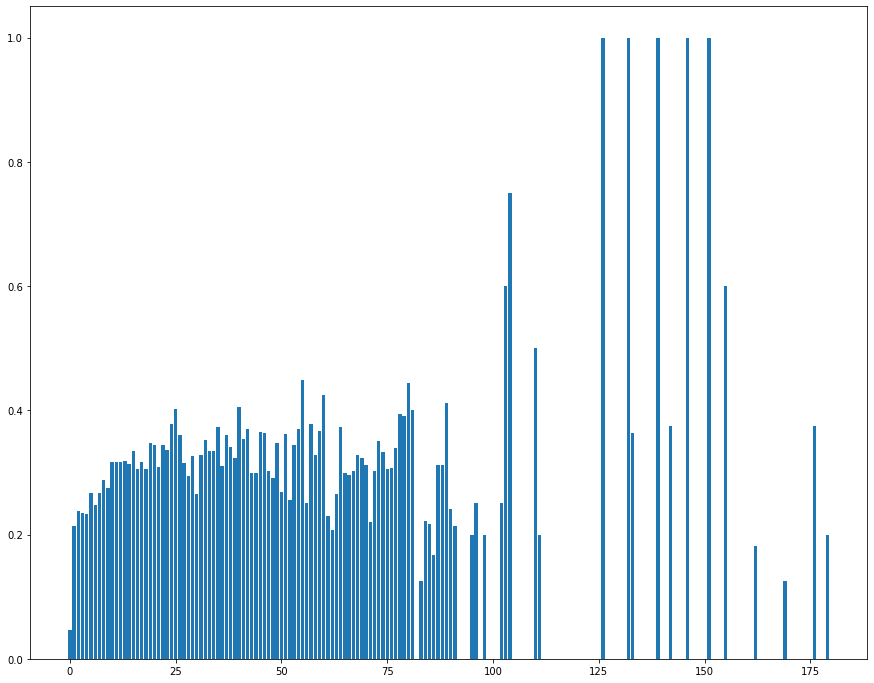

In [45]:
data = df.groupby("DaysInAdvance")["No-show"].mean()
fig, ax = plt.subplots(figsize=(15,12))
plt.bar(x = data.index, height= list(data))

While this chart seems to give a strong correlation between `DaysInAdvance` and `No-show` it is likely skewed based on the amount of data available. Let's see a histogram of the distribution of data

<AxesSubplot:xlabel='DaysInAdvance', ylabel='Count'>

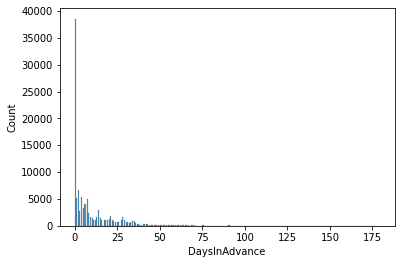

In [46]:
sns.histplot(data =df, x= "DaysInAdvance")

### Research Question 2  (Replace this header name!)

In [27]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!